### Notebook for the undifferentiated fetal cells initial and terminal states identification with CellRank

- **Developed by:** Anna Maguza
- **Place:** Wuerzburg Institute for System Immunology
- **Created date:** 20th May 2024
- **Last modified date:** 20th May 2024

### Import packages

In [1]:
import numpy as np
import pandas as pd

import cellrank as cr
import scanpy as sc
from cellrank.kernels import RealTimeKernel

from moscot.problems.time import TemporalProblem


In [2]:
import matplotlib.pyplot as plt

### Set up the cells

In [3]:
%matplotlib inline

In [4]:
sc.settings.verbosity = 3
sc.logging.print_versions()

sc.settings.set_figure_params(frameon=False, dpi=100)
cr.settings.verbosity = 2

-----
anndata     0.10.7
scanpy      1.10.1
-----
PIL                         10.3.0
absl                        NA
annotated_types             0.6.0
anyio                       NA
arrow                       1.3.0
asttokens                   NA
attr                        23.2.0
attrs                       23.2.0
babel                       2.14.0
backoff                     2.2.1
brotli                      1.1.0
bs4                         4.12.3
cellrank                    2.0.4
certifi                     2024.02.02
cffi                        1.16.0
charset_normalizer          3.3.2
chex                        0.1.86
click                       8.1.7
cloudpickle                 3.0.0
colorama                    0.4.6
comm                        0.2.2
contextlib2                 NA
croniter                    NA
cycler                      0.12.1
cython_runtime              NA
dateutil                    2.9.0
debugpy                     1.8.1
decorator                   5.1.1
dee

In [5]:
import warnings

warnings.simplefilter("ignore", category=UserWarning)

### Data Upload

In [6]:
# upload anndata file
input = '/mnt/LaCIE/annaM/gut_project/Processed_data/Gut_data/Fetal_stem_cells/FetalSC_and_undifferentiated_cells/Fetal_undifferentiated_CellRank_experimental_time.h5ad'
adata = sc.read_h5ad(input)

# Identify initial and terminal states

### Initialize an estimator

In [7]:
vk = cr.kernels.RealTimeKernel.from_adata(adata, key="T_fwd")

In [8]:
g = cr.estimators.GPCCA(vk)
print(g)

GPCCA[kernel=RealTimeKernel[n=22985], initial_states=None, terminal_states=None]


In [10]:
# Identify macrostates
g.fit(cluster_key="Cell States", n_states=[4, 12])

Computing Schur decomposition


Adding `adata.uns['eigendecomposition_fwd']`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)
Calculating minChi criterion in interval `[4, 12]`
Computing `4` macrostates
Adding `.macrostates`
       `.macrostates_memberships`
       `.coarse_T`
       `.coarse_initial_distribution
       `.coarse_stationary_distribution`
       `.schur_vectors`
       `.schur_matrix`
       `.eigendecomposition`
    Finish (0:00:00)


GPCCA[kernel=RealTimeKernel[n=22985], initial_states=None, terminal_states=None]

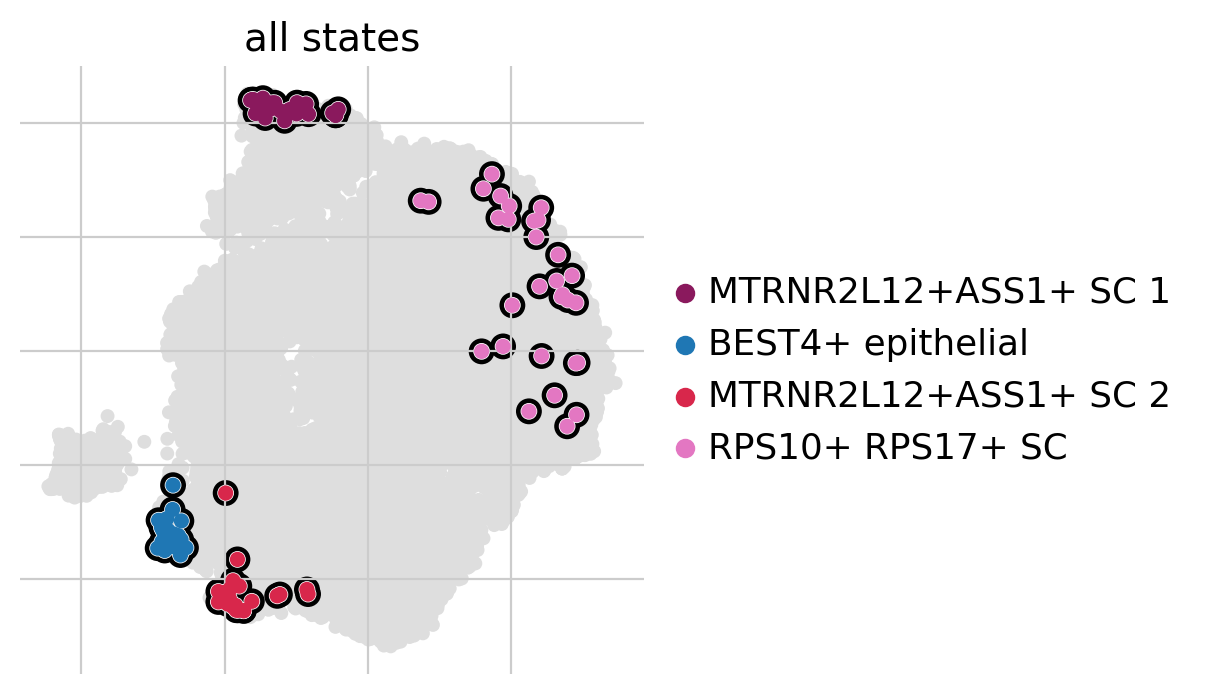

In [11]:
# Identify macrostates
g.plot_macrostates(which="all", discrete=True, legend_loc="right", s=100)

Adding `adata.obs['term_states_fwd']`
       `adata.obs['term_states_fwd_probs']`
       `.terminal_states`
       `.terminal_states_probabilities`
       `.terminal_states_memberships
    Finish`


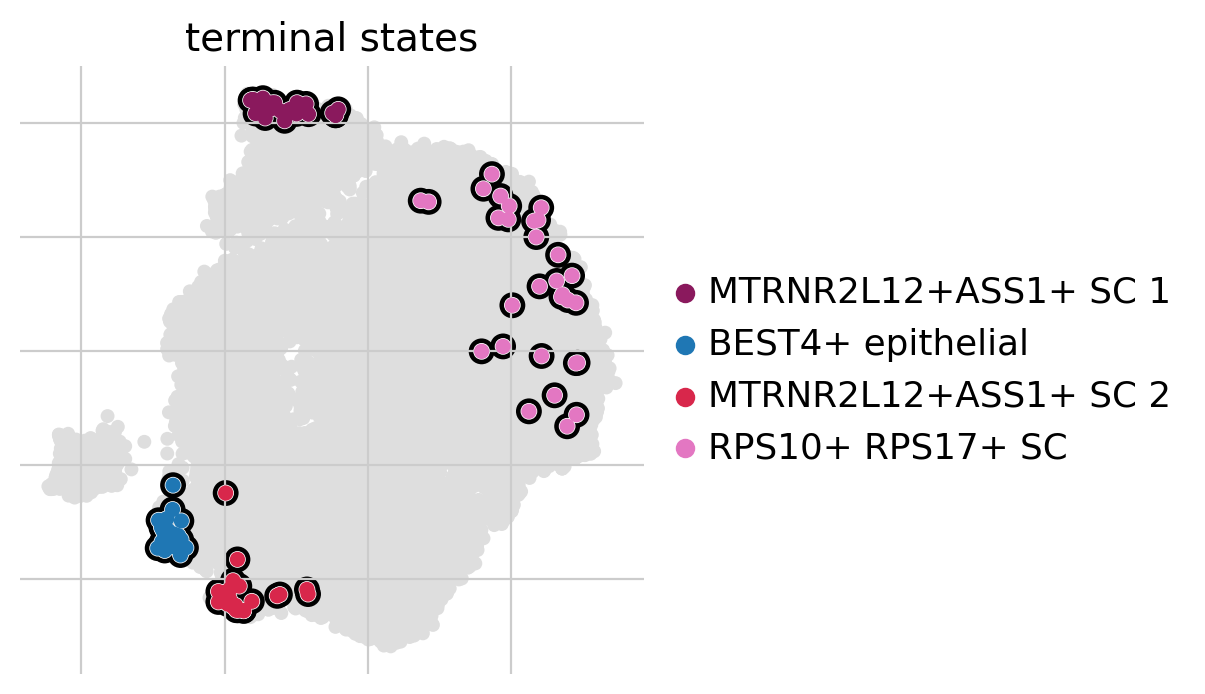

In [12]:
# identify terminal macrostates
g.predict_terminal_states()
g.plot_macrostates(which="terminal", legend_loc="right", s=100)

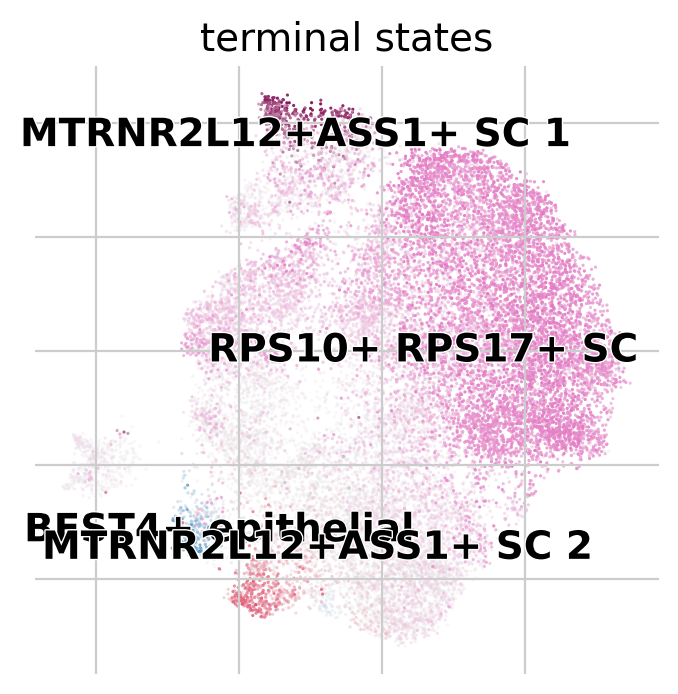

In [13]:
#While the plot above just shows the cells most confidently assigned to each terminal state, 
#we can also plot the underlying continuous distribution for each macrostate.
g.plot_macrostates(which="terminal", discrete=False)
#Each cell is colored according to the terminal state it most likely belongs to; higher color intensity reflects greater confidence in the assignment.

Adding `adata.obs['init_states_fwd']`
       `adata.obs['init_states_fwd_probs']`
       `.initial_states`
       `.initial_states_probabilities`
       `.initial_states_memberships
    Finish`


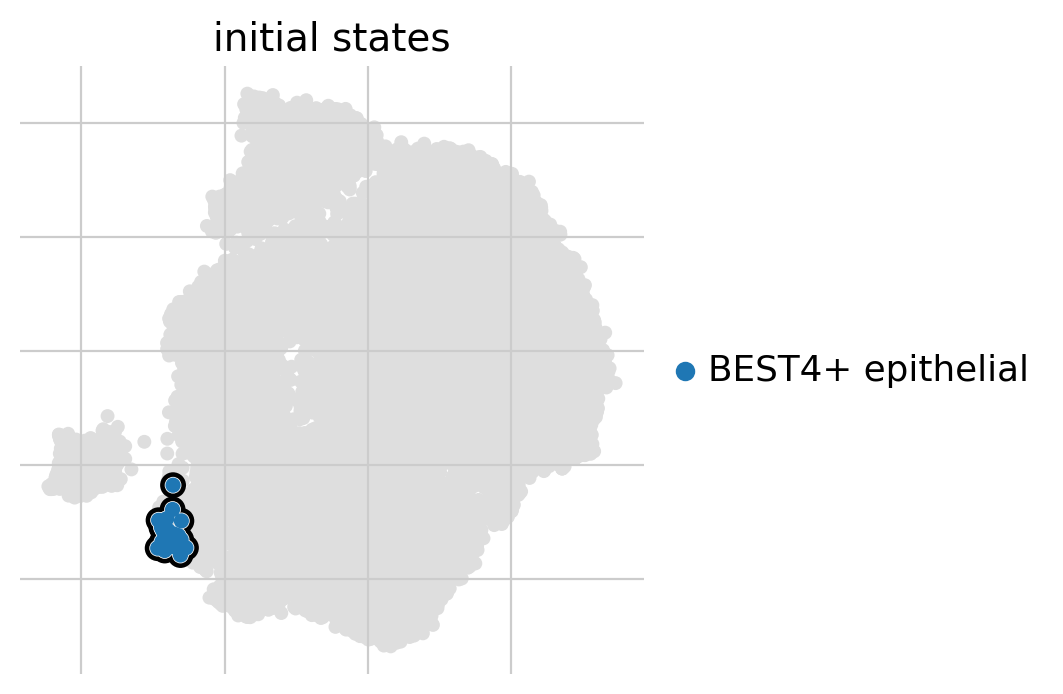

In [14]:
#identify initial states
g.predict_initial_states(allow_overlap=True)
g.plot_macrostates(which="initial", legend_loc="right", s=100)

In [15]:
#print the estimator
g

GPCCA[kernel=RealTimeKernel[n=22985], initial_states=['BEST4+ epithelial'], terminal_states=['BEST4+ epithelial', 'MTRNR2L12+ASS1+_SC_1', 'MTRNR2L12+ASS1+_SC_2', 'RPS10+_RPS17+_SC']]

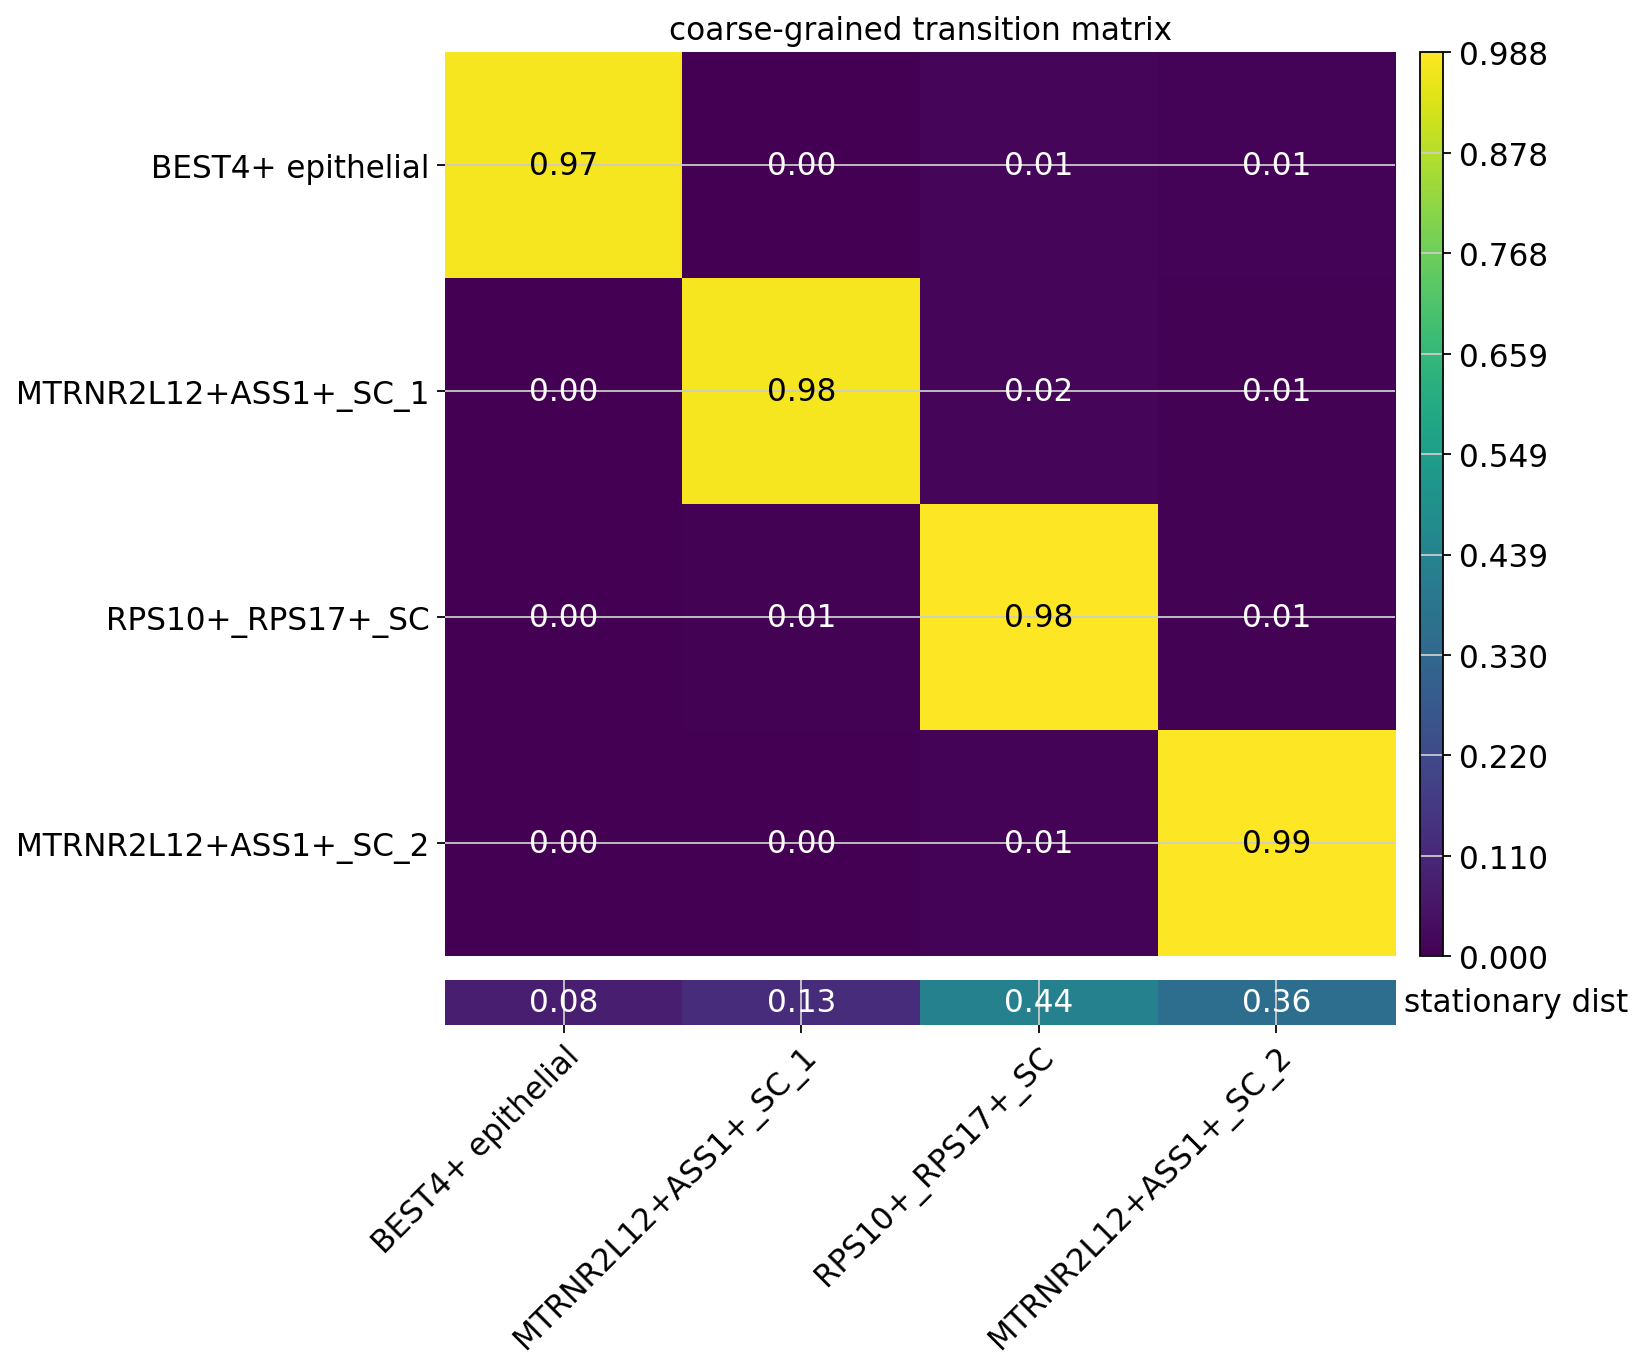

In [16]:
# Plot  coarse grained transition matrix, that classifies cells into macrostates
g.plot_coarse_T()